In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important; } </style>"))

## Imports

In [2]:
from exp.nb_structured import *

C:\Users\M323742\Anaconda3\envs\fastai\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [4]:
#import pandas as pd
import datetime as dt # for date sorting
import gc

In [5]:
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
#from IPython.display import display

from sklearn import metrics

In [6]:
path = Path("exp/BullDozerBlueBook")

In [7]:
path

WindowsPath('exp/BullDozerBlueBook')

In [8]:
df_raw = pd.read_csv(f'{path}/Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

In [9]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [10]:
display_all(df_raw.tail().T)

,4994,4995,4996,4997,4998
SalesID,1156072,1156078,1156079,1156082,1156083
SalePrice,53000,28500,6500,21000,37000
MachineID,1038720,132613,1039388,1031881,1038005
ModelID,385,13792,17472,26351,2232
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2003,1997,1999,2005,1997
MachineHoursCurrentMeter,7067,0,1379,1407,0
UsageBand,Medium,NaN,Medium,Low,NaN
saledate,2010-01-28 00:00:00,2004-04-15 00:00:00,2005-08-25 00:00:00,2009-03-12 00:00:00,2006-04-20 00:00:00


In [11]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,4999,NaN,NaN,NaN,NaT,NaT,1.14762e+06,4861.92,1.13925e+06,1.14347e+06,1.14763e+06,1.1518e+06,1.15608e+06
SalePrice,4999,NaN,NaN,NaN,NaT,NaT,33321.1,24200.8,4750,15000,26000,44000,142000
MachineID,4999,NaN,NaN,NaN,NaT,NaT,848030,313949,910,734472,1.01664e+06,1.0441e+06,1.06994e+06
ModelID,4999,NaN,NaN,NaN,NaT,NaT,7835.33,7078.6,43,3362,4685,11394,36540
datasource,4999,NaN,NaN,NaN,NaT,NaT,121,0,121,121,121,121,121
auctioneerID,4999,NaN,NaN,NaN,NaT,NaT,3,0,3,3,3,3,3
YearMade,4999,NaN,NaN,NaN,NaT,NaT,1855.54,351.865,1000,1995,2000,2004,2010
MachineHoursCurrentMeter,4999,NaN,NaN,NaN,NaT,NaT,4330.48,5495,0,821,2393,6075,88981
UsageBand,4365,3,Medium,2094,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,4999,443,2009-08-20 00:00:00,91,2004-01-19,2011-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#m = RandomForestRegressor(n_jobs=-1)
# The following code is supposed to fail due to string values in the input data
#m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

In [13]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [14]:
train_cats(df_raw)

In [15]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [16]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [17]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [18]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.833367
Blade_Extension             0.945389
Blade_Type                  0.831166
Blade_Width                 0.945389
Coupler                     0.400280
Coupler_System              0.825965
Differential_Type           0.832567
Drive_System                0.775355
Enclosure                   0.000600
Enclosure_Type              0.945389
Engine_Horsepower           0.945389
Forks                       0.488298
Grouser_Tracks              0.826365
Grouser_Type                0.744949
Hydraulics                  0.173035
Hydraulics_Flow             0.826365
MachineHoursCurrentMeter    0.000000
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.830366
Pattern_Changer             0.744949
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.541308
Pushblock                   0.945389
Ride_Control                0.662332
Ripper                      0.778356
S

In [19]:
os.makedirs('exp', exist_ok=True)
df_raw.to_feather('exp/bulldozers-raw')

In [20]:
df_raw = pd.read_feather('exp/bulldozers-raw')

In [21]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,66000,999089,3157,121,3,2004,68,2,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,57000,117657,77,121,3,1996,4640,2,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,10000,434808,7009,121,3,2001,2838,0,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,38500,1026470,332,121,3,2001,3486,0,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,11000,1057373,17311,121,3,2007,722,1,S175,...,23,3,204,False,False,False,False,False,False,1248307200


In [22]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [23]:

df, y, nas = proc_df(df_raw, 'SalePrice')

In [24]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.9765890501617599

In [54]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 500  # same as Kaggle's test set size (12000)
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((4499, 64), (4499,), (500, 64))

## Random Forests
### Base model
Let's try our model again, this time with separate training and validation sets.

In [26]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

## Speeding things up

In [27]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [28]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 872 ms
[3680.9700094538393, 3680.9700094538393, 0.976860679443556, 0.976860679443556]


## Single tree

In [29]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[19714.70002292055, 19714.70002292055, 0.33624716205871497, 0.33624716205871497]


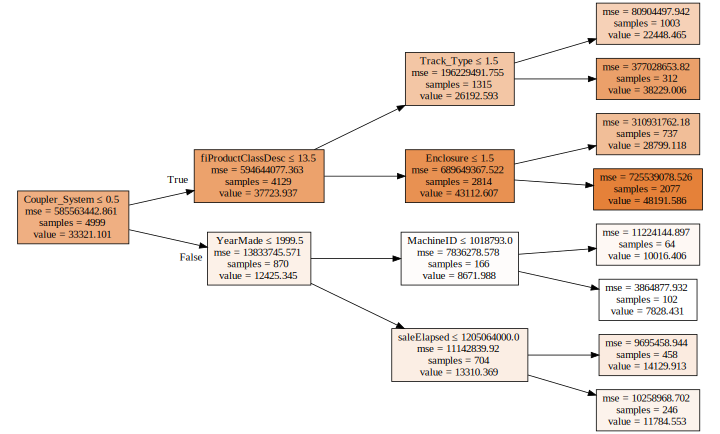

In [30]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [31]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.0, 0.0, 1.0, 1.0]


## Bagging
### Intro to bagging
To learn about bagging in random forests, let's start with our basic model again.

In [32]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[3755.0664752230646, 3755.0664752230646, 0.9759197326860991, 0.9759197326860991]


In [33]:

preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([66000., 35000., 66000., 66000., 66000., 66000., 71000., 66000., 80000., 73000., 66000., 66000.,
        66000., 66000., 35000., 66000., 66000., 66000., 80000., 66000., 66000., 66000., 47000., 66000.,
        66000., 66000., 66000., 66000., 66000., 66000., 66000., 66000., 59000., 73000., 66000., 66000.,
        66000., 66000., 37000., 66000., 66000., 66000., 66000., 66000., 72000., 66000., 66000., 73000.,
        66000., 66000., 66000., 47000., 76000., 66000., 52000., 47000., 66000., 66000., 66000., 66000.,
        35000., 66000., 66000., 66000., 66000., 66000., 66000., 66000., 73000., 67000., 66000., 66000.,
        66000., 65000., 66000., 66000., 66000., 66000., 66000., 66000., 77000., 64000., 66000., 66000.,
        66000., 66000., 37000., 66000., 66000., 66000., 66000., 66000., 71000., 52000., 57000., 80000.,
        72000., 66000., 66000., 66000.]),
 64590.0,
 66000)

In [34]:
preds.shape

(100, 4999)

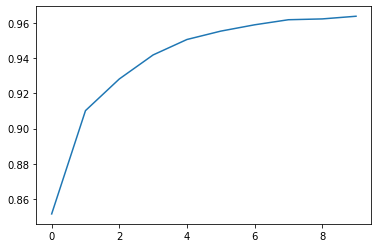

In [35]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

In [36]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[4083.3122942420728, 4083.3122942420728, 0.9715258192846873, 0.9715258192846873]


In [37]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[3767.2422624795736, 3767.2422624795736, 0.9757633191804667, 0.9757633191804667]


In [38]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[3727.539420489974, 3727.539420489974, 0.9762714863765805, 0.9762714863765805]


## Out-of-bag (OOB) score
Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called out-of-bag (OOB) error which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was not included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our print_score function below.

In [39]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[3827.014726147811, 3827.014726147811, 0.9749881214534329, 0.9749881214534329, 0.8186092886262597]


This shows that our validation set time difference is making an impact, as is model over-fitting.

## Reducing over-fitting
### Subsampling
It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: subsampling. Let's return to using our full dataset, so that we can demonstrate the impact of this technique.

In [55]:

df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((4499, 64), (4499,), (500, 64))

In [56]:
set_rf_samples(1000)

In [57]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[3747.1212408144693, 9856.433721241166, 0.976108817491215, 0.8284528542263122, 0.8273701189125533]


Since each additional tree allows the model to see more data, this approach can make additional trees more useful

In [58]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[3913.1960463545565, 9907.074248914258, 0.9739441426661223, 0.8266855710613121, 0.8114142989479098]


## Tree building parameters
We revert to using a full bootstrap sample in order to show the impact of other over-fitting avoidance methods.

In [59]:
reset_rf_samples()

In [60]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [61]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[3967.7617361070775, 9745.289351739382, 0.9732124296073023, 0.832299884471223, 0.8094231493424492]


In [62]:
t=m.estimators_[0].tree_

In [63]:
dectree_max_depth(t)

26

In [64]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[6755.369092248006, 9979.13046718862, 0.9223502037513227, 0.824155298790801, 0.8111972437683446]


In [65]:
t=m.estimators_[0].tree_

In [66]:
dectree_max_depth(t)

19

Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with min_samples_leaf) that we require some minimum number of rows in every leaf node. This has two benefits:

* There are less decision rules for each leaf node; simpler models should generalize better
* The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [67]:

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[5453.480931320756, 9784.889688875008, 0.949395428319194, 0.8309342043346186, 0.8169773801219766]


We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of columns for each split. We do this by specifying max_features, which is the proportion of features to randomly select from at each split.

* None
* 0.5
* 'sqrt'
* 1, 3, 5, 10, 25, 100

In [68]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[5687.406269348895, 9895.761945514469, 0.9449609840793219, 0.8270811401296569, 0.82313120395779]


We can't compare our results directly with the Kaggle competition, since it used a different validation set (and we can no longer to submit to this competition) - but we can at least see that we're getting similar results to the winners based on the dataset we have.

The sklearn docs [show an example](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html) of different max_features methods with increasing numbers of trees - as you see, using a subset of features on each split requires using more trees, but results in better models:

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_ensemble_oob_001.png "OOB Errors for Random Forest")

https://github.com/fastai/fastai/blob/master/courses/ml1/lesson1-rf.ipynb

## Confidence based on tree variance
For model interpretation, there's no need to use the full dataset on each tree - using a subset will be both faster, and also provide better interpretability (since an overfit model will not provide much variance across trees).

In [69]:
set_rf_samples(1000)

In [70]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[5779.249930646975, 10042.5228136679, 0.9431690248051493, 0.8219140986105015, 0.8135298035800995]


We saw how the model averages predictions across the trees to get an estimate - but how can we know the confidence of the estimate? One simple way is to use the standard deviation of predictions, instead of just the mean. This tells us the relative confidence of predictions - that is, for rows where the trees give very different results, you would want to be more cautious of using those results, compared to cases where they are more consistent. Using the same example as in the last lesson when we looked at bagging:

In [71]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

Wall time: 76.7 ms


(25569.157196969696, 5020.033075734613)

When we use python to loop through trees like this, we're calculating each in series, which is slow! We can use parallel processing to speed things up:

In [73]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

We can see that different trees are giving different estimates this this auction. In order to see how prediction confidence varies, we can add this into our dataset.

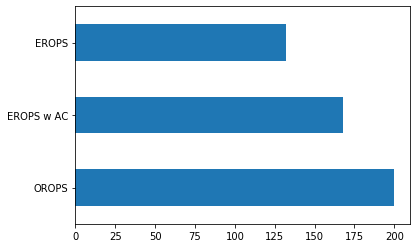

In [74]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.Enclosure.value_counts().plot.barh();

In [75]:

flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,24886.363636,26092.750632,7689.749113
1,EROPS w AC,51217.708333,48956.577475,14165.213416
2,OROPS,23865.150000,23752.322265,6161.496476


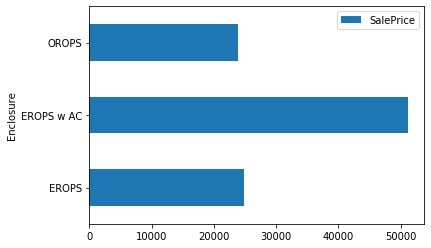

In [77]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh');

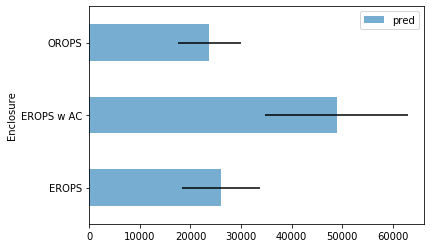

In [78]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6);

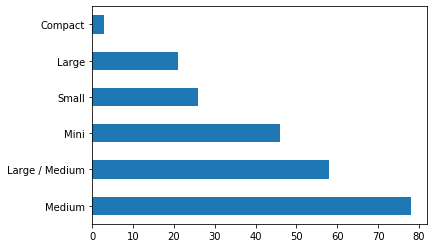

In [79]:

raw_valid.ProductSize.value_counts().plot.barh();

In [80]:

flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,17416.666667,23273.839526,6676.080246
Large,47702.380952,41422.950210,18067.933743
Large / Medium,51242.672414,50540.628244,14105.737774
Medium,47839.743590,45530.936804,14458.182575
Mini,16326.086957,16849.654147,5777.092881
Small,35019.230769,34495.324455,11536.921591


In [81]:

(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Large             0.436182
Mini              0.342861
Small             0.334449
Medium            0.317546
Compact           0.286849
Large / Medium    0.279097
dtype: float64

## Feature importance
It's not normally enough to just to know that a model can make accurate predictions - we also want to know how it's making predictions. The most important way to see this is with feature importance.

In [82]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
19,Enclosure,0.122430
5,YearMade,0.112310
14,fiProductClassDesc,0.086105
13,ProductSize,0.063894
38,Grouser_Tracks,0.061704
10,fiSecondaryDesc,0.060214
2,ModelID,0.046582
37,Coupler_System,0.044246
39,Hydraulics_Flow,0.039336
63,saleElapsed,0.032877


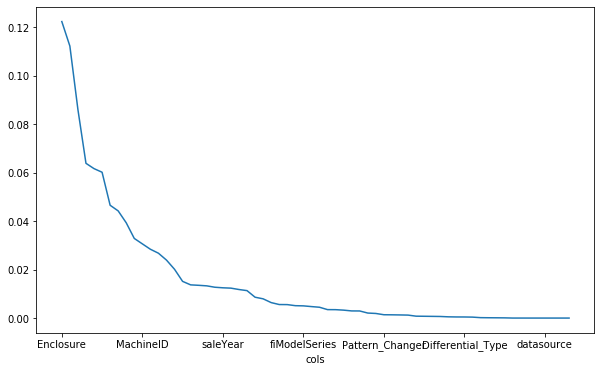

In [83]:

fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [84]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

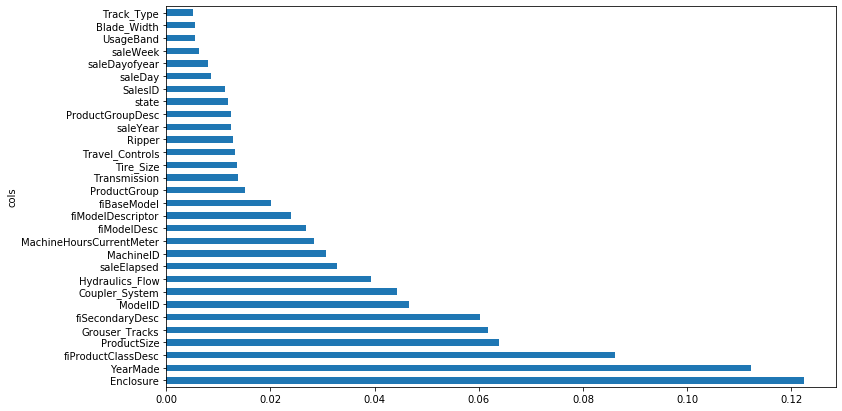

In [85]:
plot_fi(fi[:30]);

In [86]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

31

In [87]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [88]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[5781.685910666563, 10253.50675544569, 0.9431211056813571, 0.8143526609903773, 0.8166685897410176]


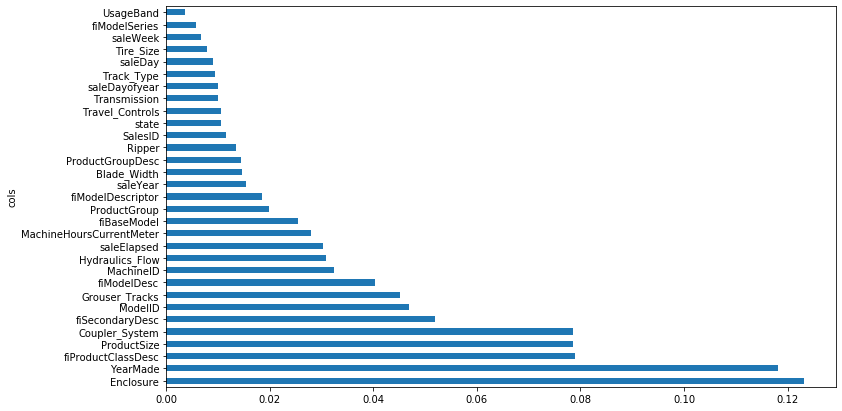

In [89]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

## One-hot encoding
proc_df's optional max_n_cat argument will turn some categorical variables into new columns.

For example, the column ProductSize which has 6 categories:

* Large
* Large / Medium
* Medium
* Compact
* Small
* Mini

gets turned into 6 new columns:

* ProductSize_Large
* ProductSize_Large / Medium
* ProductSize_Medium
* ProductSize_Compact
* ProductSize_Small
* ProductSize_Mini
and the column <b>ProductSize<b> gets removed.

It will only happen to columns whose number of categories is no bigger than the value of the max_n_cat argument.

Now some of these new columns may prove to have more important features than in the earlier situation, where all categories were in one column.

In [90]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[5811.3023641914715, 9844.27874406066, 0.9425368935055539, 0.828875698024434, 0.8066024514199049]


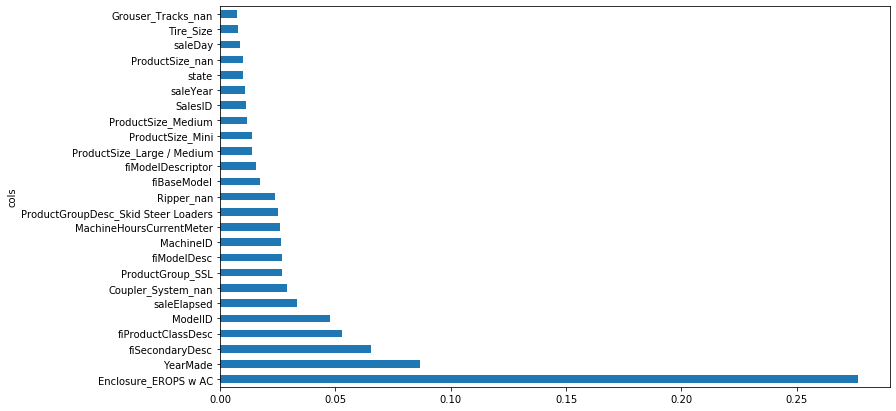

In [91]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

## Removing redundant features
One thing that makes this harder to interpret is that there seem to be some variables with very similar meanings. Let's try to remove redundent features.

In [92]:
from scipy.cluster import hierarchy as hc

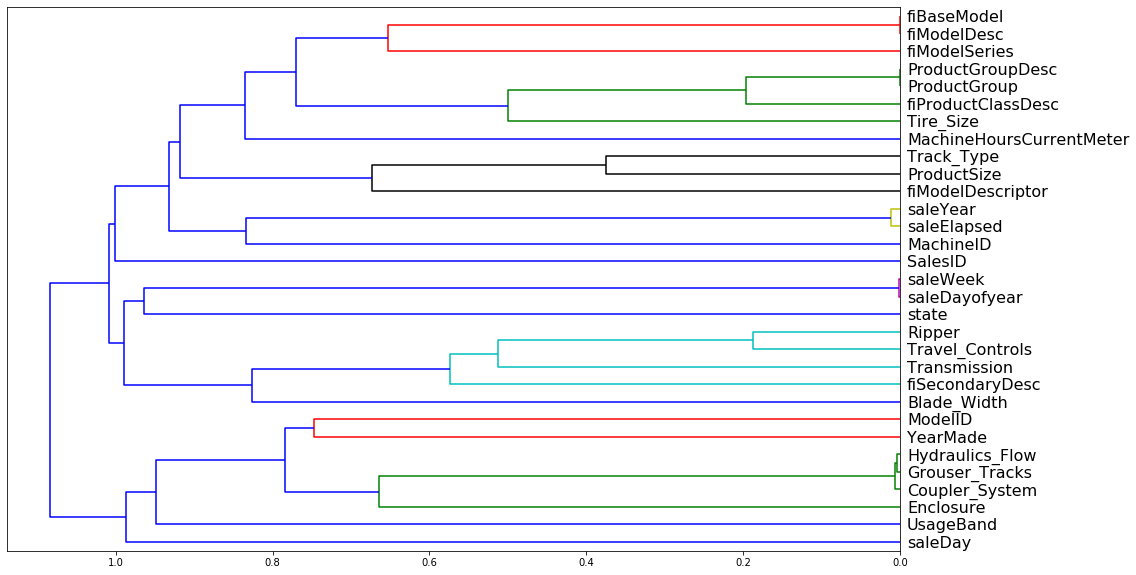

In [93]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

Let's try removing some of these related features to see if the model can be simplified without impacting the accuracy.

In [94]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

Here's our baseline.

In [95]:
get_oob(df_keep)

0.811783967613649

Now we try removing each variable one at a time.

In [96]:
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

saleYear 0.7916602707851594
saleElapsed 0.8004027655010917
fiModelDesc 0.8037671983193434
fiBaseModel 0.8022034621313049
Grouser_Tracks 0.8142092984585496
Coupler_System 0.8000720914838672


it looks like we can try one from each group for removal. Let's see what that does.

In [97]:
to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks']
get_oob(df_keep.drop(to_drop, axis=1))

0.8024952596095069

Looking good! Let's use this dataframe from here. We'll save the list of columns so we can reuse it later.

In [98]:
df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [99]:
np.save('exp/keep_cols.npy', np.array(df_keep.columns))

In [101]:
keep_cols = np.load('exp/keep_cols.npy', allow_pickle=True)
df_keep = df_trn[keep_cols]

In [103]:
keep_cols

array(['Enclosure', 'YearMade', 'fiProductClassDesc', 'ProductSize', 'fiSecondaryDesc', 'ModelID',
       'Coupler_System', 'Hydraulics_Flow', 'saleElapsed', 'MachineID', 'MachineHoursCurrentMeter',
       'fiModelDesc', 'fiModelDescriptor', 'ProductGroup', 'Transmission', 'Tire_Size', 'Travel_Controls',
       'Ripper', 'ProductGroupDesc', 'state', 'SalesID', 'saleDay', 'saleDayofyear', 'saleWeek', 'UsageBand',
       'Blade_Width', 'Track_Type', 'fiModelSeries'], dtype=object)

And let's see how this model looks on the full dataset.

In [104]:
reset_rf_samples()

In [105]:

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[5849.718038587695, 9907.817323101008, 0.9417746615141829, 0.8266595713958531, 0.8146922095576462]


## Partial dependence

In [2]:
from pdpbox import pdp
from plotnine import *


In [107]:
set_rf_samples(1000)

In [108]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

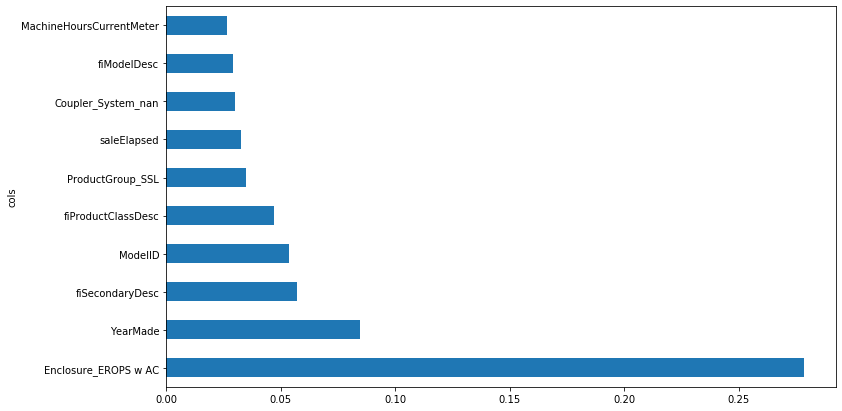

In [109]:
plot_fi(rf_feat_importance(m, df_trn2)[:10]);

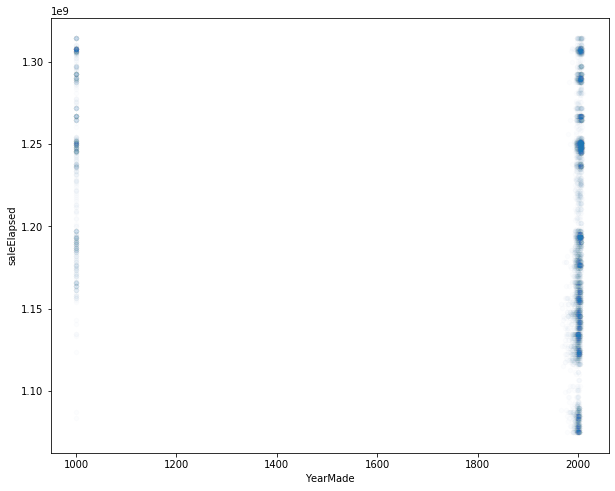

In [110]:
df_raw.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8));

In [111]:
x_all = get_sample(df_raw[df_raw.YearMade>1930], 500)

In [112]:
ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')

NameError: name 'ggplot' is not defined

In [ ]:

x = get_sample(X_train[X_train.YearMade>1930], 500)

In [ ]:

def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

In [ ]:

plot_pdp('YearMade')

In [ ]:

plot_pdp('YearMade', clusters=5)

In [ ]:

feats = ['saleElapsed', 'YearMade']
p = pdp.pdp_interact(m, x, feats)
pdp.pdp_interact_plot(p, feats)

In [ ]:
plot_pdp(['Enclosure_EROPS w AC', 'Enclosure_EROPS', 'Enclosure_OROPS'], 5, 'Enclosure')

In [ ]:

df_raw.YearMade[df_raw.YearMade<1950] = 1950
df_keep['age'] = df_raw['age'] = df_raw.saleYear-df_raw.YearMade

In [ ]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, df_keep));


## Tree interpreter

In [113]:
from treeinterpreter import treeinterpreter as ti

ModuleNotFoundError: No module named 'treeinterpreter'

In [ ]:
df_train, df_valid = split_vals(df_raw[df_keep.columns], n_trn)

In [ ]:
row = X_valid.values[None,0]; row

In [ ]:
prediction, bias, contributions = ti.predict(m, row)

In [ ]:
prediction[0], bias[0]

In [ ]:
idxs = np.argsort(contributions[0])

In [ ]:
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], contributions[0][idxs])]

In [ ]:
contributions[0].sum()

In [ ]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

In [ ]:

m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

In [ ]:
fi = rf_feat_importance(m, x); fi[:10]

In [ ]:
feats=['SalesID', 'saleElapsed', 'MachineID']

In [ ]:
(X_train[feats]/1000).describe()

In [ ]:
(X_valid[feats]/1000).describe()

In [ ]:
x.drop(feats, axis=1, inplace=True)

In [ ]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

In [ ]:
fi = rf_feat_importance(m, x); fi[:10]

In [ ]:
set_rf_samples(50000)

In [ ]:
feats=['SalesID', 'saleElapsed', 'MachineID', 'age', 'YearMade', 'saleDayofyear']

In [ ]:

X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
for f in feats:
    df_subs = df_keep.drop(f, axis=1)
    X_train, X_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

In [ ]:
reset_rf_samples()

In [ ]:
df_subs = df_keep.drop(['SalesID', 'MachineID', 'saleDayofyear'], axis=1)
X_train, X_valid = split_vals(df_subs, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [ ]:
plot_fi(rf_feat_importance(m, X_train));

In [ ]:
np.save('exp/BullDozerBlueBook/subs_cols.npy', np.array(df_subs.columns))

# Final Model

In [ ]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

# Fin

In [ ]:
gc.collect()

In [16]:

print(f'Finished at: {dt.datetime.now()}')

Finished at: 2020-05-08 10:11:01.966322
